Train a Convolution Neural Network to map DNA sequence onto observed read depth: 

In [2]:
from train import train
training_data, training_log = train(number_epochs=1000, logging_interval=50, print_to_console=True, tensorboard_dir='../trained_model/tensorboard', graph_variables_dir='../trained_model/graph_variables')

number of examples: 536
number of trainable parameters: 7536776
epoch: 0 elapsed time (secs): 2.91406297684 cost: 134.61041 observed_depths: [294.79  77.06  27.35] predicted_depths: [1.0620718 1.0512139 1.0367867]
epoch: 50 elapsed time (secs): 114.835012913 cost: 64.54708 observed_depths: [294.79  77.06  27.35] predicted_depths: [7.1806574 4.9032526 5.121252 ]
epoch: 100 elapsed time (secs): 208.056591034 cost: 11.1965475 observed_depths: [294.79  77.06  27.35] predicted_depths: [84.60219  35.092876 38.014904]
epoch: 150 elapsed time (secs): 300.823608875 cost: 10.453495 observed_depths: [294.79  77.06  27.35] predicted_depths: [109.11994   35.07051   37.309185]
epoch: 200 elapsed time (secs): 393.833518028 cost: 9.667661 observed_depths: [294.79  77.06  27.35] predicted_depths: [144.7582    35.882587  37.344578]
epoch: 250 elapsed time (secs): 488.851754904 cost: 8.877341 observed_depths: [294.79  77.06  27.35] predicted_depths: [186.23312   36.612865  37.095974]
epoch: 300 elapsed t

Save the training data together with their predictions: 

In [7]:
from train import pickle 
pickle(training_data, training_log, dataframe_dir='../trained_model/training_data')
training_data.head()

,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,10500,294.79,CCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCC...,10200,295.297699
1,1,10800,77.06,TCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAA...,10500,74.536705
2,1,11100,27.35,CACATGCTAGCGCGTCGGGGTGGAGGCGTGGCGCAGGCGCAGAGAG...,10800,28.482908
3,1,11400,49.95,CTCACGTCACGGTGGCGCGGCGCAGAGACGGGTAGAACCTCAGTAA...,11100,48.604000
4,1,11700,82.31,GCACGCCCACCTGCTGGCAGCTGGGGACACTGCCGGGCCCTCTTGC...,11400,82.367226


Compare the corrected depth profile (observed depth divided by predicted depth) with the normalized depth profile (observed depth divided by their mean): 

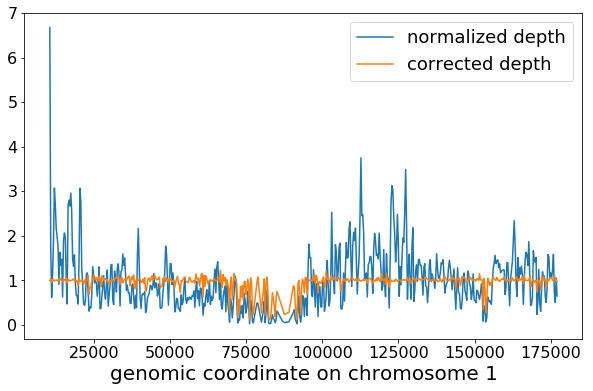

In [3]:
from train import unpickle
training_data, training_log = unpickle(dataframe_dir='../trained_model/training_data')

%matplotlib inline 
from train import plot_corrected_depths
plot_corrected_depths(training_data)

Optional: Visualize the `tensorflow` computation graph and training metrics by executing the following command and then [clicking here](http://localhost:6006). 

In [5]:
%%capture 
!tensorboard --logdir='../trained_model/tensorboard'

Make predictions on an independent test set containing a chromosomal deletion: 

In [1]:
from test import test 
test_data = test()
test_data.head()

number of examples: 598
INFO:tensorflow:Restoring parameters from ../trained_model/graph_variables/trained_model.ckpt


,chromosome_number,end,observed_depth,sequence,start,predicted_depth
0,1,189654300,51.12,TCTTATTAGCAAGAAAAAAAAAATACCAGCAAAAGGTTGTAAAACA...,189654000,44.620758
1,1,189654600,50.34,TGCCTAGAATCTGATCTGTTCAGAAAGCAGACAGCAGTTGTTAGAT...,189654300,48.912815
2,1,189654900,47.85,ATTGGAGCTGTAGTAGCCATCCTGACACCATGAGGAGAAGTTTTGA...,189654600,33.084896
3,1,189655200,52.90,GAAAATTCAAGTTAGTAAATTCTTAAAAACTTTCTCTTTCTTCCTG...,189654900,23.164253
4,1,189655500,49.91,CGTATTATTGCTTCTATTAATGTTGTTCACTATTTACCAAATGTAA...,189655200,31.344372


Notice that the predicted depths are not nearly as close to the observed depths as they were in the training set, i.e. the algorithm does not generalize well (yet). 

Visually inspect the generalization performance of the prediction algorithm on the test set:

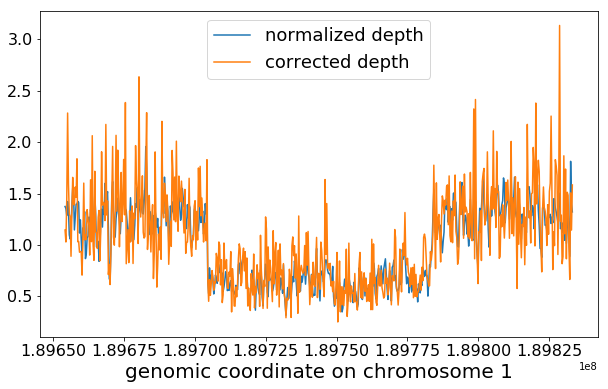

In [2]:
from plot import plot_corrected_depths
plot_corrected_depths(test_data)